**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,active.min,active.max,active.tot,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,history_originator,history_responder,proto_tcp,proto_udp,local_resp_F,local_resp_T,local_orig_T,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_36,fwd_header_size_max_40,fwd_header_size_max_44,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,conn_state_OTH,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_SF,conn_state_SH,conn_state_SHR,bwd_PSH_flag_count_0,bwd_PSH_flag_count_1,bwd_PSH_flag_count_2,bwd_PSH_flag_count_3,bwd_PSH_flag_count_4,bwd_PSH_flag_count_5,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_36,bwd_header_size_min_40,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_36,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,resp_pkts_0,resp_pkts_1,is_attack
0,0.0036,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455593,-0.080869,-0.587519,-0.098153,0,0.423015,0.423094,0.423084,0.189614,-0.076865,-0.566269,-0.082805,-0.086560,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.405096,-0.432596,-0.456239,-0.435351,-0.027583,-0.541624,-0.578154,-0.525495,-0.546095,-0.054007,-0.067402,-0.465705,-0.055674,-0.550180,-0.011506,-0.578154,-0.578154,-0.578154,-0.578154,-0.344984,-0.360738,0.018485,-0.113698,netscan,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1.0658,-0.004033,0,-0.468417,-0.302472,-0.844209,-0.453680,-0.080869,-0.218469,-0.098153,0,-0.188617,-0.179541,-0.184092,2.928182,-0.074339,0.039640,-0.082805,-0.066354,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.396514,-0.425762,-0.454189,-0.426995,-0.025780,-0.535821,-0.576418,-0.517839,-0.537879,-0.054007,-0.067402,0.100855,-0.055674,-0.550180,-0.011506,-0.576418,-0.576418,-0.576418,-0.576418,-0.371233,-0.336014,-0.223839,0.118904,rudeadyet,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0.0068,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455605,-0.080869,-0.587519,-0.098153,0,0.866483,0.866727,0.866664,

In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,active.min,active.max,active.tot,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,history_originator,history_responder,proto_tcp,proto_udp,local_resp_F,local_resp_T,local_orig_T,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_36,fwd_header_size_max_40,fwd_header_size_max_44,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,conn_state_OTH,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_SF,conn_state_SH,conn_state_SHR,bwd_PSH_flag_count_0,bwd_PSH_flag_count_1,bwd_PSH_flag_count_2,bwd_PSH_flag_count_3,bwd_PSH_flag_count_4,bwd_PSH_flag_count_5,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_36,bwd_header_size_min_40,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_36,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,resp_pkts_0,resp_pkts_1,is_attack
0,0.0130,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455561,-0.080869,-0.587519,-0.098153,0,0.098590,0.098548,0.098576,0.189614,-0.076865,-0.566269,-0.082805,-0.086560,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.405096,-0.432596,-0.456239,-0.435351,-0.026834,-0.541528,-0.578127,-0.525252,-0.546095,-0.054007,-0.067402,-0.465705,-0.055674,-0.550180,-0.011506,-0.578127,-0.578127,-0.578127,-0.578127,-0.344984,-0.360738,0.018485,-0.113698,netscan,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,304.5026,-0.004029,0,0.171795,-0.011805,-0.844209,-0.455622,0.040416,-0.956568,0.040896,0,-0.197839,-0.197992,-0.197929,-2.548953,0.046908,-0.841683,0.056210,0.034676,-0.418228,-0.292785,-0.054735,-0.302456,-0.287079,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.292824,-0.056694,-0.318003,-0.289188,-0.400110,1.596671,1.785677,0.433022,2.477037,-0.405096,-0.432596,-0.456239,-0.435351,-0.027169,1.550177,1.780321,1.233322,1.570542,-0.054007,-0.051145,-1.032266,-0.055379,-0.550180,-0.011506,1.780321,1.780321,1.780321,1.780321,-0.370681,-0.360738,-0.218742,-0.113698,normal,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,405.8051,-0.004028,0,0.385199,0.081854,-0.844209,2.279516,0.060630,4.579172,0.199809,5,-0.197741,-0.197893,-0.197831,0.189614,-0.046

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

In [6]:
x_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

x = df_train[x_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

x_val = df_test[x_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((205027, 130), (205027,))

In [10]:
x_train.shape,y_train.shape

((615080, 130), (615080,))

In [11]:
x_val.shape, y_val.shape

((273370, 130), (273370,))

In [12]:
# Define the model
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Define early stopping
monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Best_Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=512, callbacks=[monitor, checkpoint])

Train on 615080 samples, validate on 205027 samples
Epoch 1/100
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 2/100
615080/615080 [==============================] - 3s 4us/sample - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 3/100
615080/615080 [==============================] - 3s 4us/sample - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 4/100
615080/615080 [==============================] - 3s 4us/sample - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 5/100
615080/615080 [==============================] - 3s 4us/sample - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 6/100
615080/615080 [==============================] - 3s 4us/sample - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 7/100
615080/615080 [===============

615080/615080 [==============================] - 3s 4us/sample - loss: 2.5104e-04 - accuracy: 0.9999 - val_loss: 4.4805e-04 - val_accuracy: 0.9999
Epoch 51/100
615080/615080 [==============================] - 3s 4us/sample - loss: 2.3079e-04 - accuracy: 1.0000 - val_loss: 4.3712e-04 - val_accuracy: 1.0000
Epoch 52/100
615080/615080 [==============================] - 3s 4us/sample - loss: 1.9376e-04 - accuracy: 1.0000 - val_loss: 4.7548e-04 - val_accuracy: 0.9999
Epoch 53/100
615080/615080 [==============================] - 3s 4us/sample - loss: 2.4234e-04 - accuracy: 1.0000 - val_loss: 4.6084e-04 - val_accuracy: 1.0000
Epoch 54/100
615080/615080 [==============================] - 3s 4us/sample - loss: 2.7739e-04 - accuracy: 0.9999 - val_loss: 5.1514e-04 - val_accuracy: 0.9999
Epoch 55/100
615080/615080 [==============================] - 3s 4us/sample - loss: 2.2018e-04 - accuracy: 0.9999 - val_loss: 4.5911e-04 - val_accuracy: 1.0000
Epoch 56/100
615080/615080 [=========================

Epoch 97/100
615080/615080 [==============================] - 3s 4us/sample - loss: 1.2598e-04 - accuracy: 1.0000 - val_loss: 4.5558e-04 - val_accuracy: 1.0000
Epoch 98/100
615080/615080 [==============================] - 3s 4us/sample - loss: 1.8528e-04 - accuracy: 1.0000 - val_loss: 4.5346e-04 - val_accuracy: 1.0000
Epoch 99/100
615080/615080 [==============================] - 3s 4us/sample - loss: 1.1527e-04 - accuracy: 1.0000 - val_loss: 4.5172e-04 - val_accuracy: 1.0000
Epoch 100/100
615080/615080 [==============================] - 3s 4us/sample - loss: 1.4718e-04 - accuracy: 1.0000 - val_loss: 4.5269e-04 - val_accuracy: 1.0000


In [13]:
# Load the best saved model
best_model = load_model('Best_Model.h5')

# Evaluate the best saved model
score = best_model.evaluate(x_val, y_val)
print('')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

273370/273370 [==============================] - 6s 22us/sample - loss: 2.1725e-04 - accuracy: 0.9999

Test loss: 0.00021725265130451848
Test accuracy: 0.9999488


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               33536     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

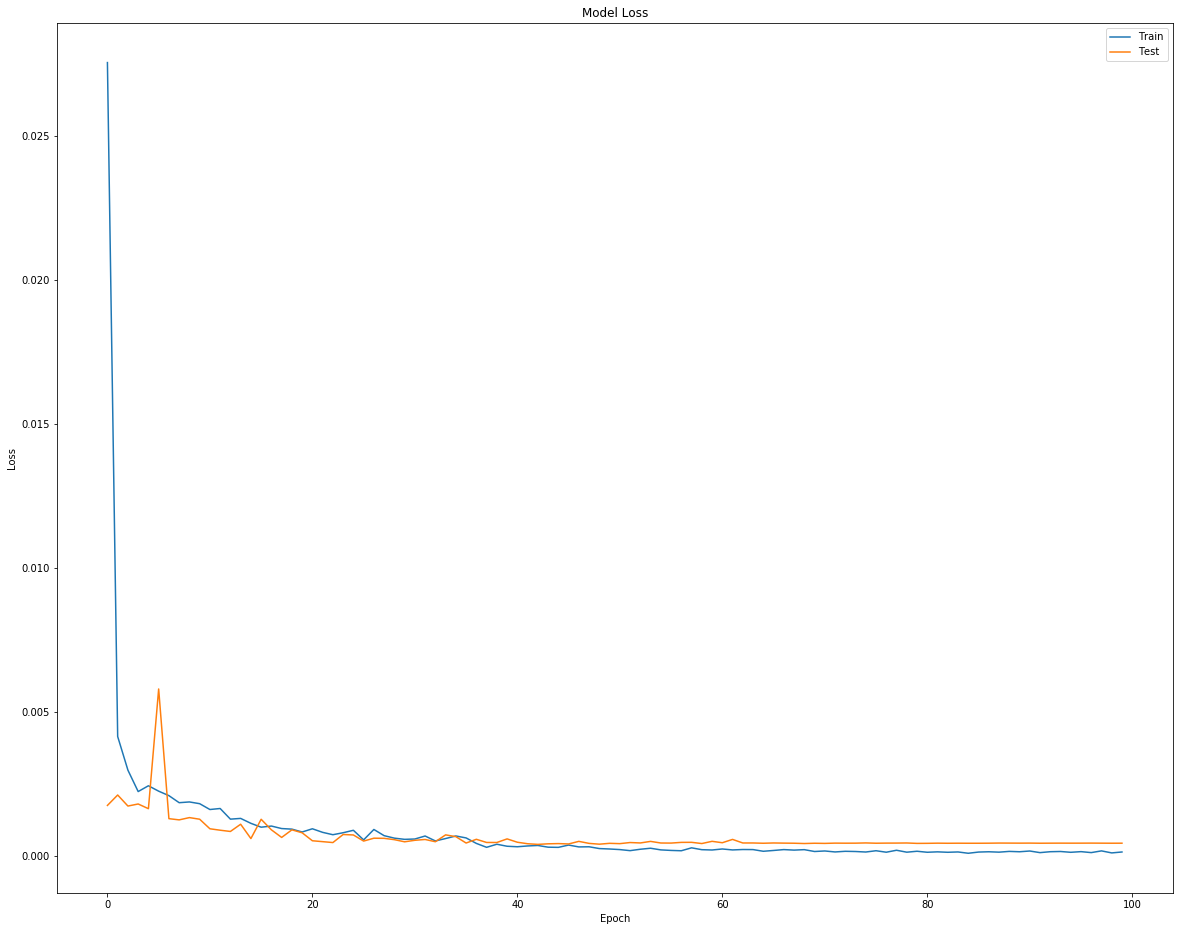

In [15]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
pred = model.predict(x_val)

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """    
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [18]:
pred = np.round(pred).astype(int)
calculate_metrics("Binary SMOTE - DNN", y_val, pred)

--- Performance of Binary SMOTE - DNN ---
Accuracy : 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
Balanced accuracy: 100.0%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108580
           1       1.00      1.00      1.00    164790

    accuracy                           1.00    273370
   macro avg       1.00      1.00      1.00    273370
weighted avg       1.00      1.00      1.00    273370



In [19]:
def compute_metrics(pred, y_test):
    y_pred = np.round(pred).astype(int)
    
    correct = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(y_test, y_pred, average = 'weighted')
    print(f"F1Score: {f1score}")

In [20]:
compute_metrics(pred, y_val)

Accuracy: 0.999967077587153
Recall: 0.999967077587153
Precision: 0.9999670776668071
F1Score: 0.9999670776130086


-------------------------------------

**Result Plots**

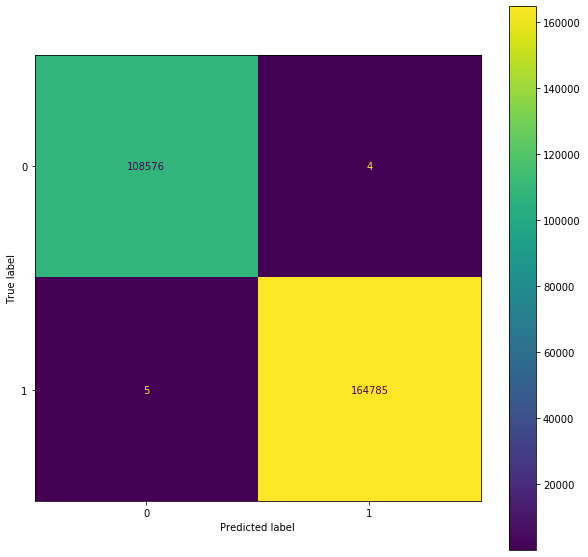

In [21]:
# Compute confusion matrix
y_pred = np.round(pred).astype(int)
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)

In [22]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

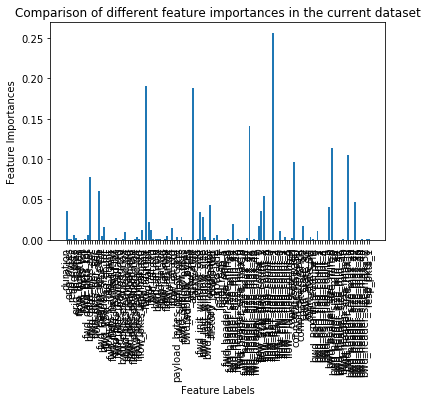

In [23]:
# Plot for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

## 